In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
import numpy as np
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision.transforms import ToTensor
from torch.autograd import Variable

In [2]:
# MNIST Dataset (Images and Labels) 
train_dataset = datasets.MNIST(
    root ='./data',  
    train = True,  
    transform = transforms.ToTensor(),
    download = True) 
  
test_dataset = datasets.MNIST(
    root ='./data',  
    train = False,  
    transform = transforms.ToTensor(),
    download = True) 

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:07<00:00, 1282787.90it/s]


Extracting ./data\MNIST\raw\train-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 127160.56it/s]


Extracting ./data\MNIST\raw\train-labels-idx1-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:02<00:00, 588750.90it/s] 


Extracting ./data\MNIST\raw\t10k-images-idx3-ubyte.gz to ./data\MNIST\raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<?, ?it/s]

Extracting ./data\MNIST\raw\t10k-labels-idx1-ubyte.gz to ./data\MNIST\raw



In [3]:
train_dataset


Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [4]:
test_dataset

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [5]:
from torch.utils.data import DataLoader

loaders = {
    'train' : DataLoader(train_dataset,
                        batch_size = 100,
                        shuffle = True,
                        num_workers = 1),

    'test' : DataLoader(test_dataset,
                        batch_size = 100,
                        shuffle = True,
                        num_workers = 1),
}

In [6]:
loaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x1d85c69f7d0>,
 'test': <torch.utils.data.dataloader.DataLoader at 0x1d8535e3b60>}

In [7]:
class CNN(nn.Module):

    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)),2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.softmax(x)

In [8]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = CNN().to(device)
optimizer = optim.Adam(model.parameters(), lr = 0.001)
loss_fn = nn.CrossEntropyLoss()

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(loaders['train']):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 20 == 0:
            print(f'Train Epoch:{epoch} [{batch_idx *len(data)}/{len(loaders["train"].dataset)} ({100. * batch_idx / len(loaders["train"]):.0f}%)]\t{loss.item():.6}') 

def test():
    model.eval()

    test_loss = 0
    correct = 0

    with torch.no_grad():
        for data, target in loaders['test']:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target).item()
            pred = output.argmax(dim = 1, keepdim = True)
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(loaders['test'].dataset)
    print(f'\nTest set : Average loss: {test_loss:4f}, Accuracy {correct}/{len(loaders["test"].dataset)} ({100. * correct / len(loaders["test"].dataset):.0f} %\n)')

In [9]:
for epoch in range(1, 11):
    train(epoch)
    test()

C:\Users\HP\AppData\Local\Temp\ipykernel_84448\3891851454.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


Train Epoch:1 [0/60000 (0%)]	2.30349
Train Epoch:1 [2000/60000 (3%)]	2.29404
Train Epoch:1 [4000/60000 (7%)]	2.21485
Train Epoch:1 [6000/60000 (10%)]	2.14373
Train Epoch:1 [8000/60000 (13%)]	2.0644
Train Epoch:1 [10000/60000 (17%)]	1.92465
Train Epoch:1 [12000/60000 (20%)]	1.84972
Train Epoch:1 [14000/60000 (23%)]	1.77667
Train Epoch:1 [16000/60000 (27%)]	1.77191
Train Epoch:1 [18000/60000 (30%)]	1.77849
Train Epoch:1 [20000/60000 (33%)]	1.85424
Train Epoch:1 [22000/60000 (37%)]	1.77038
Train Epoch:1 [24000/60000 (40%)]	1.80494
Train Epoch:1 [26000/60000 (43%)]	1.72046
Train Epoch:1 [28000/60000 (47%)]	1.72244
Train Epoch:1 [30000/60000 (50%)]	1.70744
Train Epoch:1 [32000/60000 (53%)]	1.76588
Train Epoch:1 [34000/60000 (57%)]	1.7541
Train Epoch:1 [36000/60000 (60%)]	1.67669
Train Epoch:1 [38000/60000 (63%)]	1.65217
Train Epoch:1 [40000/60000 (67%)]	1.64292
Train Epoch:1 [42000/60000 (70%)]	1.63493
Train Epoch:1 [44000/60000 (73%)]	1.71625
Train Epoch:1 [46000/60000 (77%)]	1.65009
Train

In [10]:
device

device(type='cuda')

Prediction: 7


C:\Users\HP\AppData\Local\Temp\ipykernel_84448\3891851454.py:18: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.softmax(x)


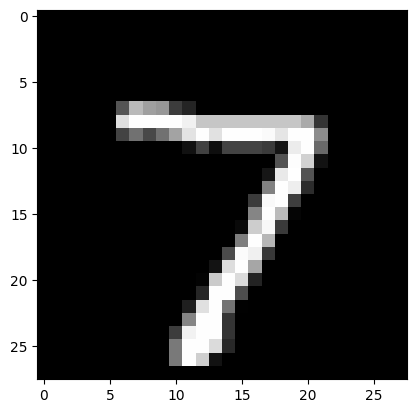

In [11]:
import matplotlib.pyplot as plt
model.eval()
data, target = test_dataset[0]
data = data.unsqueeze(0).to(device)
output = model(data)
prediction = output.argmax(dim = 1, keepdim = True).item()
print(f'Prediction: {prediction}')
image = data.squeeze(0).squeeze(0).cpu().numpy()
plt.imshow(image, cmap='gray')
plt.show()